In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import scipy.optimize as opt
from scipy.optimize import curve_fit
import os
import re


In [2]:
def powerlaw(t,K,n,Af,tau):
    return Af*(1-np.exp(-K*np.power(t+tau,n)/Af))#/Af))


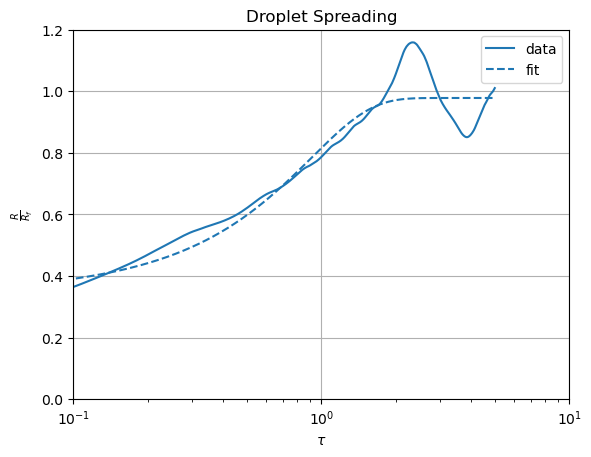

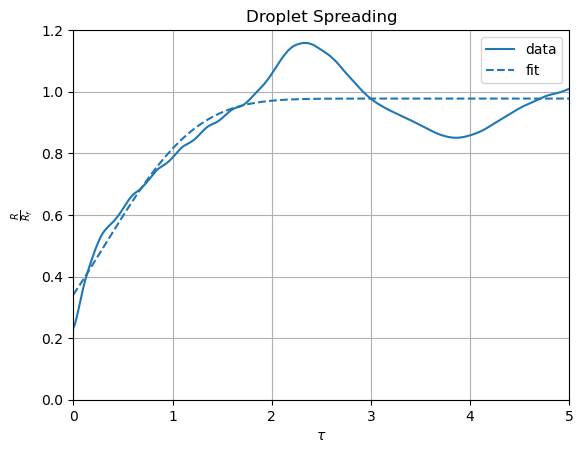

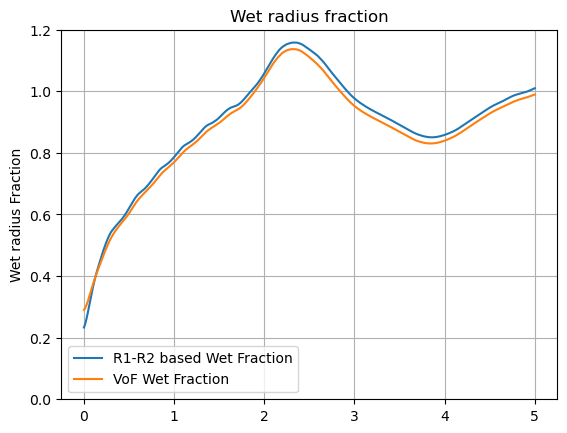

In [6]:
fit_param=np.zeros([1,4])

temp=pd.read_csv('./monitor/dropinfo',header=0,delimiter='\\s+')#,skiprows=1)
temp2=pd.read_csv('./monitor/simulation',header=0,delimiter='\\s+')#,skiprows=1)
data=temp[1:].astype('float32') # Drop first row and interpret data as floating point numbers. 
data2=temp2[1:].astype('float32') # Drop first row and interpret data as floating point numbers. 
    # === Plot Data === #
xdata=data['Time'].to_numpy()
ydata=data['WetAreaFract'].to_numpy()
ydata2=data['VoF_WF'].to_numpy()

ydata=ydata
p=plt.semilogx(xdata,ydata,label='data')
    # === Fit model === #
    #popt, pcov = curve_fit(powerlaw, data['Time'], np.pi*np.power(data['Wetted'],2),[1,0.5,1,8])
popt, pcov = curve_fit(powerlaw, xdata, ydata,bounds=(10**-3,[10,10,10,2]))
fit_param[0,:]=popt
p=plt.semilogx(xdata,powerlaw(xdata,popt[0],popt[1],popt[2],popt[3]),'--',color=p[0].get_color(),label='fit')


plt.ylim([0,1.2])
plt.xlim([1e-1,1e1])
plt.title('Droplet Spreading')
plt.xlabel(r'$\tau$')

plt.ylabel(r'$\frac{R}{R_f}$')
plt.legend()
plt.grid()#True,which='Both')
plt.show()

s=plt.plot(xdata,ydata,label='data')
s=plt.plot(xdata,powerlaw(xdata,popt[0],popt[1],popt[2],popt[3]),'--',color=p[0].get_color(),label='fit')

plt.ylim([0,1.2])
plt.xlim([0,5])
plt.title('Droplet Spreading')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\frac{R}{R_f}$')
plt.legend()
plt.grid()#True,which='Both')
plt.show()

plt.plot(xdata,ydata,label='R1-R2 based Wet Fraction')
plt.plot(xdata,ydata2,label='VoF Wet Fraction')
plt.legend()
plt.title('Wet radius fraction')
plt.ylim([0,1.2])
plt.ylabel('Wet radius Fraction')
plt.grid()
plt.show()

    

In [ ]:
#K,n,A_f,tau
fit_param

In [ ]:
s=plt.plot(xdata,data['Totalvol'].to_numpy()*3/4/np.pi,label='data')
#plt.ylim([40,90])
plt.grid()

In [6]:
data

,Timestep,Time,VOFmax,VOFmin,Totalvol,Dropheight,WetAreaFract,VoF_WF,CL,CA,CA.1,C,alpha
1,0.0,0.000000,1.0,0.0,4.18808,1.85300,0.354473,0.416599,0.000000,2.245010,128.630005,0.354473,0.000000
2,1.0,0.035280,1.0,0.0,4.18814,1.85300,0.354544,0.416635,0.002004,2.244740,128.613998,0.354780,0.000199
3,2.0,0.070559,1.0,0.0,4.18823,1.85302,0.354598,0.416654,0.001543,2.244460,128.598007,0.354887,0.000307
4,3.0,0.105838,1.0,0.0,4.18831,1.85305,0.354670,0.416677,0.002034,2.244080,128.576004,0.355154,0.000607
5,4.0,0.141118,1.0,0.0,4.18839,1.85308,0.354730,0.416700,0.001703,2.243790,128.559998,0.355201,0.000678
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5667,5666.0,199.893997,1.0,0.0,4.45403,1.00071,0.973874,0.922621,0.000963,0.987931,56.604301,0.341740,0.197673
5668,5667.0,199.929001,1.0,0.0,4.45401,1.00049,0.973908,0.922650,0.000966,0.987884,56.601601,0.340558,0.198327
5669,5668.0,199.964005,1.0,0.0,4.45399,1.00028,0.973941,0.922679,0.000953,0.987841,56.599098,0.345296,0.195720
5670,5669.0,199.998993,1.0,0.0,4.45397,1.00005,0.973975,0.922707,0.000966,0.987791,56.596298,0.340492,0.198364
